<a href="https://colab.research.google.com/github/Shubham04689/CNN-image-classification/blob/main/U3W12_45_Keras_Traffic_Sign_Detection_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint

## Learning Objectives





At the end of the experiment you will be able to :

* load and extract features of images

* implement convolutional neural networks using Keras

In [34]:
#@title Experiment Walkthrough Video

from IPython.display import HTML

HTML("""<video width="854" height="480" controls>
  <source src="https://cdn.exec.talentsprint.com/non-processed/Keras_Traffic_Sign_Detection.mp4" type="video/mp4">
</video>
""")

## Introduction

Traffic sign recognition is a challenging, real-world problem relevant for AI based transportation systems. Traffic signs show a wide range of variations between classes in terms of color, shape, and the presence of pictograms or text. However, there exist subsets of
classes (e.g., speed limit signs) that are very similar to each other Using a comprehensive traffic sign detection dataset, here we will perform CNN to classify each different road sign for us.


![alt text](https://cdn.iiith.talentsprint.com/aiml/Experiment_related_data/Images/img.png)

sftp://extras@cdn.iiith.talentsprint.com/home/extras/public_html/aiml/Experiment_related_data/Images/img.png



## Dataset
The dataset choosen for this experiment is  GTSRB dataset, a dataset with over 1213 images of German Traffic Signs. There are 43 classes (43 different types of signs that we’re going to have to classify).

**Labels / Classes**

    1:'Speed limit (20km/h)',
    2:'Speed limit (30km/h)',
    3:'Speed limit (50km/h)',
    4:'Speed limit (60km/h)',
    5:'Speed limit (70km/h)',
    6:'Speed limit (80km/h)',
    7:'End of speed limit (80km/h)',
    8:'Speed limit (100km/h)',
    9:'Speed limit (120km/h)',
    10:'No passing',
    11:'No passing veh over 3.5 tons',
    12:'Right-of-way at intersection',
    13:'Priority road',
    14:'Yield',
    15:'Stop',
    16:'No vehicles',
    17:'Veh > 3.5 tons prohibited',
    18:'No entry',
    19:'General caution',
    20:'Dangerous curve left',
    21:'Dangerous curve right',
    22:'Double curve',
    23:'Bumpy road',
    24:'Slippery road',
    25:'Road narrows on the right',
    26:'Road work',
    27:'Traffic signals',
    28:'Pedestrians',
    29:'Children crossing',
    30:'Bicycles crossing',
    31:'Beware of ice/snow',
    32:'Wild animals crossing',
    33:'End speed + passing limits',
    34:'Turn right ahead',
    35:'Turn left ahead',
    36:'Ahead only',
    37:'Go straight or right',
    38:'Go straight or left',
    39:'Keep right',
    40:'Keep left',
    41:'Roundabout mandatory',
    42:'End of no passing',
    43:'End no passing veh > 3.5 tons'


### Setup Steps:

In [35]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "2302031" #@param {type:"string"}

In [36]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "7004297988" #@param {type:"string"}

In [33]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()

notebook= "U3W12_45_Keras_Traffic_Sign_Detection_A" #name of the notebook

def setup():
#  ipython.magic("sx pip3 install torch")
    from IPython.display import HTML, display
    ipython.magic("sx apt-get -qq install -y libfluidsynth1")
    ipython.magic("sx wget -qq  https://cdn.iiith.talentsprint.com/aiml/Experiment_related_data/FullIJCNN2013.zip")
    ipython.magic("sx unzip -qq FullIJCNN2013.zip")
    display(HTML('<script src="https://staging.dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")

    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:
        print(r["err"])
        return None
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getAnswer() and getComplexity() and getAdditional() and getConcepts() and getWalkthrough() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional,
              "concepts" : Concepts, "record_id" : submission_id,
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook, "feedback_walkthrough":Walkthrough ,
              "feedback_experiments_input" : Comments,
              "feedback_inclass_mentor": Mentor_support}

      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:
        print(r["err"])
        return None
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://aiml-iiith.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id


def getAdditional():
  try:
    if not Additional:
      raise NameError
    else:
      return Additional
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None

def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None


def getWalkthrough():
  try:
    if not Walkthrough:
      raise NameError
    else:
      return Walkthrough
  except NameError:
    print ("Please answer Walkthrough Question")
    return None

def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None


def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError
    else:
      return Answer
  except NameError:
    print ("Please answer Question")
    return None


def getId():
  try:
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


## Import Required packages

In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import glob
from PIL import Image
# Keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D,Dropout

## Load the data

#### About glob.iglob:

The glob library  provides methods for traversing the file system and returning files that matched a defined set of glob patterns.

**Note:** Refer to  [glob.iglob](https://docs.python.org/3/library/glob.html)

In [38]:
images_data = glob.glob("/content/FullIJCNN2013/*/*.ppm")
len(images_data)

1213

## Extract features and labels from the data

In [39]:
data, labels = [], []
for i in images_data:
    try:
        img = Image.open(i)
        img = img.resize((30,30))#.reshape(30*30*3)
        labels.append(int(i.split("/")[3]))
        data.append(np.array(img))
    except:
        pass

In [40]:
#Converting lists into numpy arrays
data = np.array(data)
print("data:",data.shape)
labels = np.array(labels)
print("labels:",labels.shape)

data: (1213, 30, 30, 3)
labels: (1213,)


## Split the data into train and test sets


In [41]:
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [42]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(970, 30, 30, 3) (243, 30, 30, 3) (970,) (243,)


## Data Pre-Processing

In [43]:
# YOUR CODE HERE: To convert the y_train and y_test labels to_categorical
# Convert labels to categorical format
y_train_categorical = to_categorical(y_train, num_classes=43)
y_test_categorical = to_categorical(y_test, num_classes=43)

print("y_train_categorical:", y_train_categorical.shape)
print("y_test_categorical:", y_test_categorical.shape)



y_train_categorical: (970, 43)
y_test_categorical: (243, 43)


## Visualize the sample image of each class

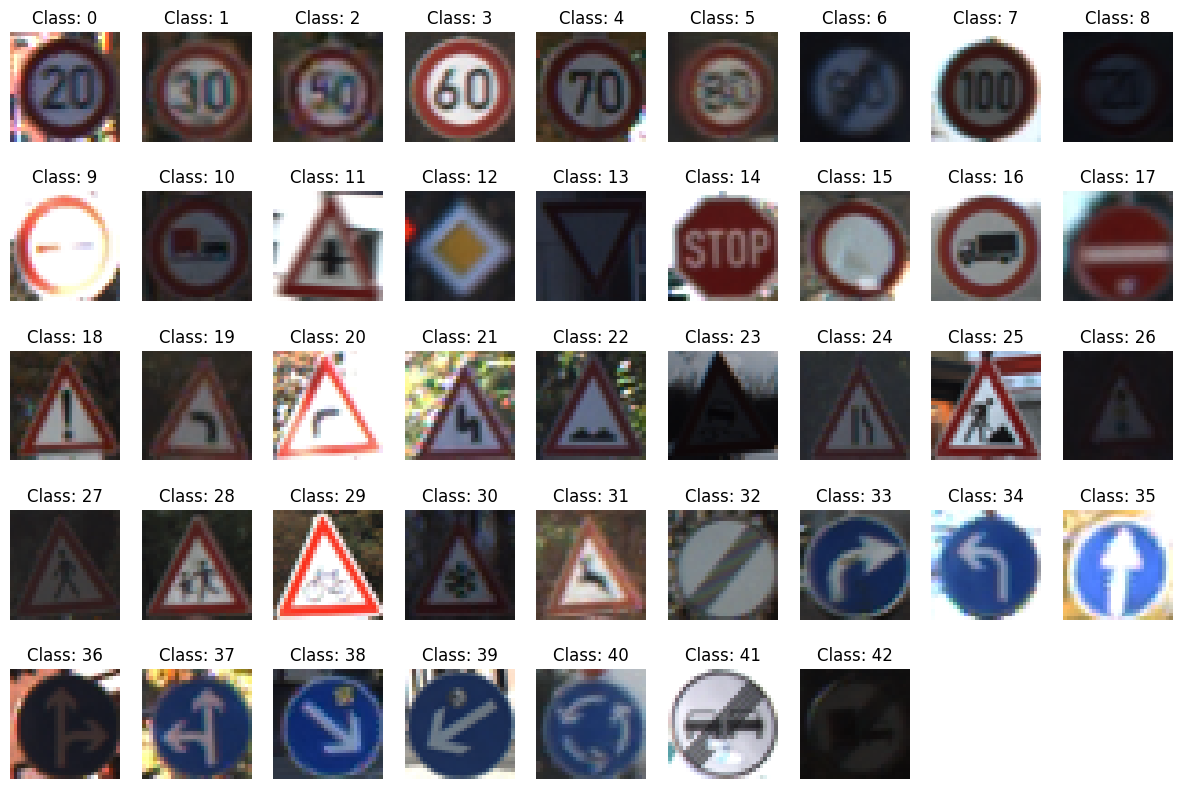

In [44]:
# YOUR CODE HERE: To plot the sample image of each class
# Create a dictionary to store sample images for each class
sample_images = {}

# Find one sample image for each class
for label in np.unique(labels):
    sample_images[label] = data[labels == label][0]

# Plot sample images
plt.figure(figsize=(15, 10))
for i, (label, image) in enumerate(sample_images.items()):
    plt.subplot(5, 9, i + 1)
    plt.imshow(image)
    plt.title(f"Class: {label}")
    plt.axis("off")
plt.show()


## Preparing the model

Initialize our CNN model by creating an instance of Sequential. The Sequential function initializes a linear stack of layers of the network from input to output

In [45]:
model = Sequential()

Adding First Convolution Layer to CNN

*   First parameter is number of output_channels
*   Second parameter is the kernel_size
*   Third parameter is activation function. Use rectifier function, shortened as relu.
*   Final parameter is input_shape, which is the height and width of the rgb image

In [46]:
# YOUR CODE HERE: To define and add first convolutional layer with parameters filters = 32 and kernel_size=(5,5), activation 'relu' and the input_shape
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=(30,30,3)))
# YOUR CODE HERE: to define and add a maxpool layer with pool_size=2
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

Adding Second Convolution Layer to CNN

*   First parameter is number of output_channels
*   Second parameter is the kernel_size
*   Third parameter is activation function. Use rectifier function, shortened as relu.

In [47]:
# YOUR CODE HERE: To define and add second convolutional layer with filters = 64 and kernel_size=(3,3) and activation 'relu'
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
# YOUR CODE HERE: to define and add a maxpool layer with pool_size=2
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())

Adding Fully Connected Layer

*   First parameter is number of nodes in each layer.
*   Second parameter is activation function. Use rectifier function, shortened as relu.


In [48]:
# YOUR CODE HERE: To define and add a dense layer with relu as activation and 256 neurons
model.add(Dense(256, activation='relu'))

Adding Output Layer  

* First parameter of output layer is changed because the expected nodes at the output layer is 43 nodes, here we’re dealing with a classification problem that has 43 categories to classify in the GTSRB dataset.

* Change the activation function to Softmax to get the probabilities of those 43 classes. Softmax is a sigmoid function applied to an independent variable with more than two categories

In [49]:
# YOUR CODE HERE: To define and add a dense layer for 43 classes with softmax as activation
model.add(Dense(43, activation='softmax'))

Compiling the CNN

* The first parameter is to get the optimal set of weights in the neural network. Adam is really efficient  to use for large amount of data.
* The second parameter is the loss function. Since our classes are categorical, we use  categorical_crossentopy loss function.
* The final argument is the criterion to evaluate the model. In this case we use the accuracy.

In [50]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

To view the model summary

In [51]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        2432      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 5, 5, 64)         

## Training the Model



* First parameter contains train images
* Second parameter contains labels
* Epochs represents the number of times we’re going to pass our full dataset through the CNN.

In [52]:
history = model.fit(X_train, y_train_categorical, epochs=15, validation_data=(X_test, y_test_categorical))

Epoch 1/15
31/31 [==============================] - 7s 24ms/step - loss: 14.4553 - accuracy: 0.1299 - val_loss: 3.1516 - val_accuracy: 0.2551
Epoch 2/15
31/31 [==============================] - 0s 5ms/step - loss: 2.8884 - accuracy: 0.3062 - val_loss: 2.3506 - val_accuracy: 0.4938
Epoch 3/15
31/31 [==============================] - 0s 6ms/step - loss: 2.0416 - accuracy: 0.5155 - val_loss: 1.7476 - val_accuracy: 0.6626
Epoch 4/15
31/31 [==============================] - 0s 5ms/step - loss: 1.4963 - accuracy: 0.6134 - val_loss: 1.3458 - val_accuracy: 0.6955
Epoch 5/15
31/31 [==============================] - 0s 5ms/step - loss: 1.1697 - accuracy: 0.7206 - val_loss: 1.0613 - val_accuracy: 0.7572
Epoch 6/15
31/31 [==============================] - 0s 5ms/step - loss: 0.8911 - accuracy: 0.7577 - val_loss: 0.8732 - val_accuracy: 0.8107
Epoch 7/15
31/31 [==============================] - 0s 5ms/step - loss: 0.6395 - accuracy: 0.8155 - val_loss: 0.7107 - val_accuracy: 0.8601
Epoch 8/15
31/31 [

## Evaluate the model

* First parameter is predicted labels of the test images
* Second parameter is actual labels of the test labels

In [54]:
test_loss, test_acc = model.evaluate(X_test, y_test_categorical)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)


8/8 [==============================] - 0s 3ms/step - loss: 0.5755 - accuracy: 0.8807
Test Loss: 0.5754613876342773
Test Accuracy: 0.8806584477424622


### Please answer the questions below to complete the experiment:




In [55]:
#@title State True or False: Keras does backpropagation automatically using the compile method (model.compile) { run: "auto", form-width: "500px", display-mode: "form" }
Answer = "TRUE" #@param ["","TRUE", "FALSE"]


In [56]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good, But Not Challenging for me" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [57]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "no" #@param {type:"string"}


In [58]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["","Yes", "No"]


In [59]:
#@title  Experiment walkthrough video? { run: "auto", vertical-output: true, display-mode: "form" }
Walkthrough = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [60]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [61]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [62]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 3975
Date of submission:  09 May 2024
Time of submission:  11:05:41
View your submissions: https://aiml-iiith.talentsprint.com/notebook_submissions
